# Analysis of Life Expectancy, Literacy Rate, Per Capita, Electricy Access of South East Asian countries.

Given the World Development Indicators dataset provided by the World bank. I am particularly interested to know how South East Asian countries have been performing over time, the report provides the code in python as well as the figures obtained from the analysis and the inferences from the figures.

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import fill_between
from IPython.display import Image
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#Read Datasets
country = pd.read_csv('./input/Country.csv')
country_notes = pd.read_csv('./input/CountryNotes.csv')
indicators = pd.read_csv('./input/Indicators.csv')
#Stylistic Options
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    


##1. What percentage of the population has access to electricity?
The charts below show the percentage of the urban and rural population with access to electricity and the comparison of the country's performance with its neighboring south-east Asian nations.

###1.1 Access to electricity over time
The percentage of populations( rural, urban and overall) who have access to electricity for years ranging from 1990 to 2014 have been taken to plot the time series graph.

('Nepal', 2)
('Indonesia', 2)
('Bangladesh', 2)
('Russian Federation', 2)
('Sri Lanka', 1)
('India', 0)
('Myanmar', 2)
('Pakistan', 2)
('China', 2)
('Japan', 2)
('Singapore', 2)
('Thailand', 2)
('Vietnam', 0)
('Philippines', 2)
('Korea, Rep.', 0)
('Malaysia', 1)


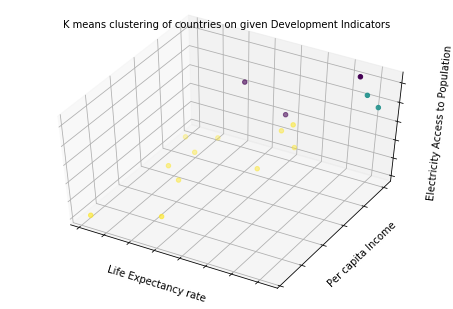

In [3]:
def cluster(attributes):
    countries_attributes={}
    countries_list=['Nepal','Indonesia','Bangladesh','Russian Federation','Sri Lanka','India','Myanmar','Pakistan','China', 'Japan','Singapore','Thailand','Vietnam','Philippines','Korea, Rep.','Malaysia']
    #attributes={'gdp_per_person':'NY.GDP.PCAP.CD','percent_electricity_access':'EG.ELC.ACCS.ZS','electricity_consumption':'EG.USE.ELEC.KH.PC','life_expectancy':'SP.DYN.LE00.IN'}

    for cntry in countries_list:
        countries_attributes[cntry]=[]

    for cntry in countries_list:
        for attr in attributes.values():
            df_elec_pop = indicators[(indicators.CountryName==cntry)&(indicators.IndicatorCode==attr)&(indicators.Year==2012)]
            #print(list(df_elec_pop.Value)[0])
            #print(list(df_elec_pop.Value))
            countries_attributes[cntry].append(float(list(df_elec_pop.Value)[0]))
    #print(countries_attributes)
            #df_gdp_pop=indicators[(indicators.CountryName==cntry)&(indicators.IndicatorCode=='')

    count=0
    X=[]
    Y=[]
    for key in countries_attributes:
        if count==0:
            X=np.array(countries_attributes[key],dtype=float)
            X=np.reshape(X,(1,len(countries_attributes[key])))
            #print(np.shape(X))
            Y=np.array(key,dtype=str)        
            count+=1
        else:
            row_to_append=np.reshape(np.array(countries_attributes[key],dtype=float),(1,len(countries_attributes[key])))
            #print(row_to_append)
            #print(np.shape(row_to_append))
            X=np.append(X,row_to_append,axis=0)
            Y=np.append(Y,np.array(key,dtype=str))
    #print(X)
    np.shape(X)
    #print(Y)



    #applying k means clustering
    clf=KMeans(n_clusters=3)
    clf.fit(X,Y)
    for cntry,label in zip(countries_list,clf.labels_):
        print(cntry,label)
    
    fig = plt.figure()
    #ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
    ax = Axes3D(fig, elev=48)
    labels = clf.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 1], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Life Expectancy rate')
    ax.set_ylabel('Per capita Income')
    ax.set_zlabel('Electricity Access to Population')
    ax.set_title('K means clustering of countries on given Development Indicators', fontsize=10)
    plt.show()
attributes1={'gdp_per_person':'NY.GDP.PCAP.CD','percent_electricity_access':'EG.ELC.ACCS.ZS','electricity_consumption':'EG.USE.ELEC.KH.PC','life_expectancy':'SP.DYN.LE00.IN'}
cluster(attributes1)
pass


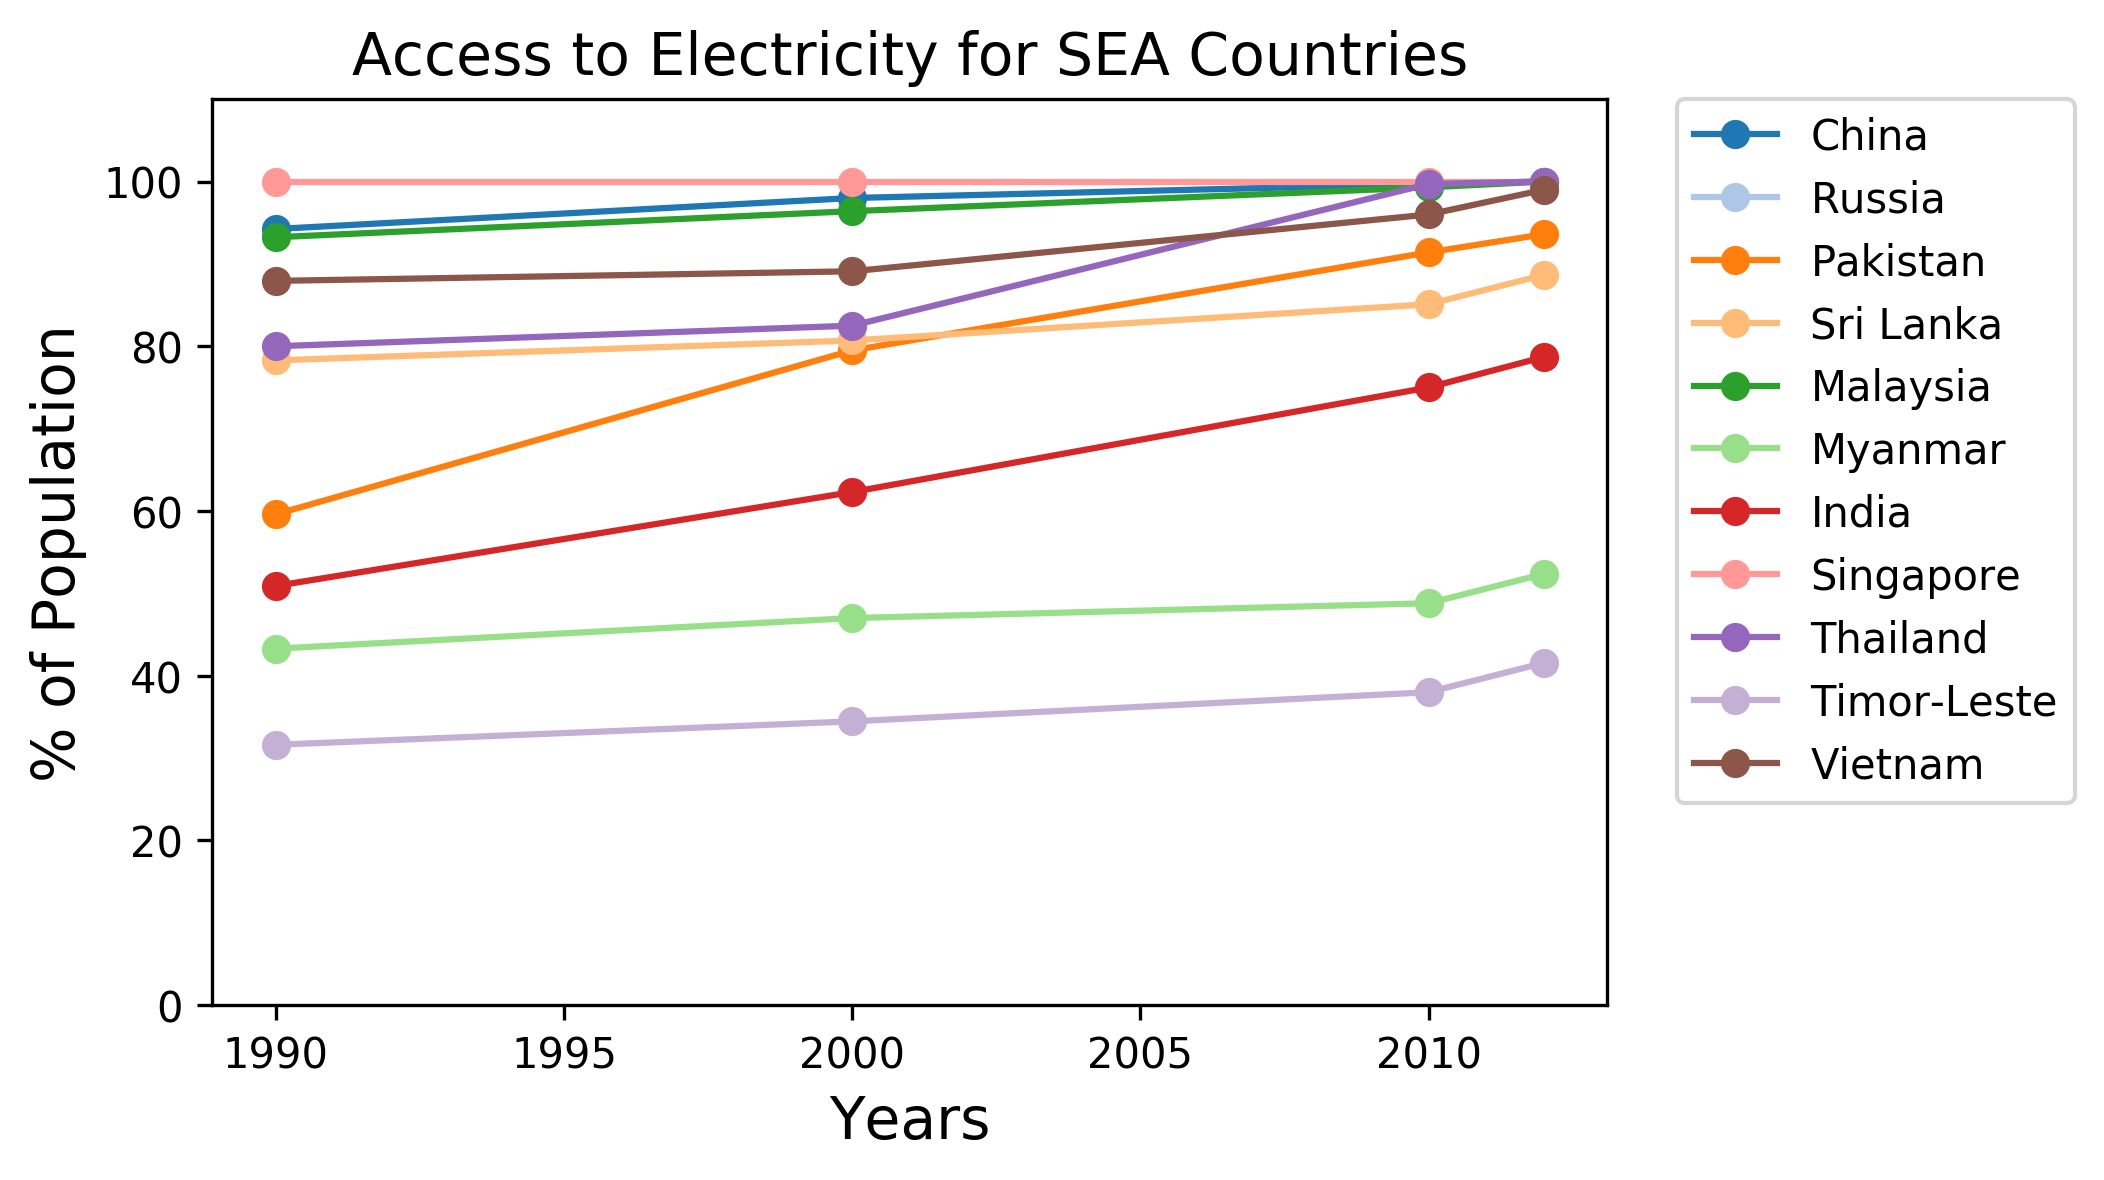

In [8]:
#this is for percentage electricity access
df_ca_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_rs_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_pk_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_sl_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

fig = plt.figure()

plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,'o-',label='China',color=tableau20[0])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,'o-',label='Russia',color=tableau20[1])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,'o-',label='Pakistan',color=tableau20[2])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,'o-',label='Sri Lanka',color=tableau20[3])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,'o-',label='Malaysia',color=tableau20[4])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,'o-',label='Myanmar',color=tableau20[5])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,'o-',label='India',color=tableau20[6])
plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,'o-',label='Singapore',color=tableau20[7])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,'o-',label='Thailand',color=tableau20[8])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,'o-',label='Timor-Leste',color=tableau20[9])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Vietnam',color=tableau20[10])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Population',  fontsize=14)
plt.title('Access to Electricity for SEA Countries', fontsize=14)
plt.ylim([0,110])
fig.savefig('access_electricity_sea.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./access_electricity_sea.png')

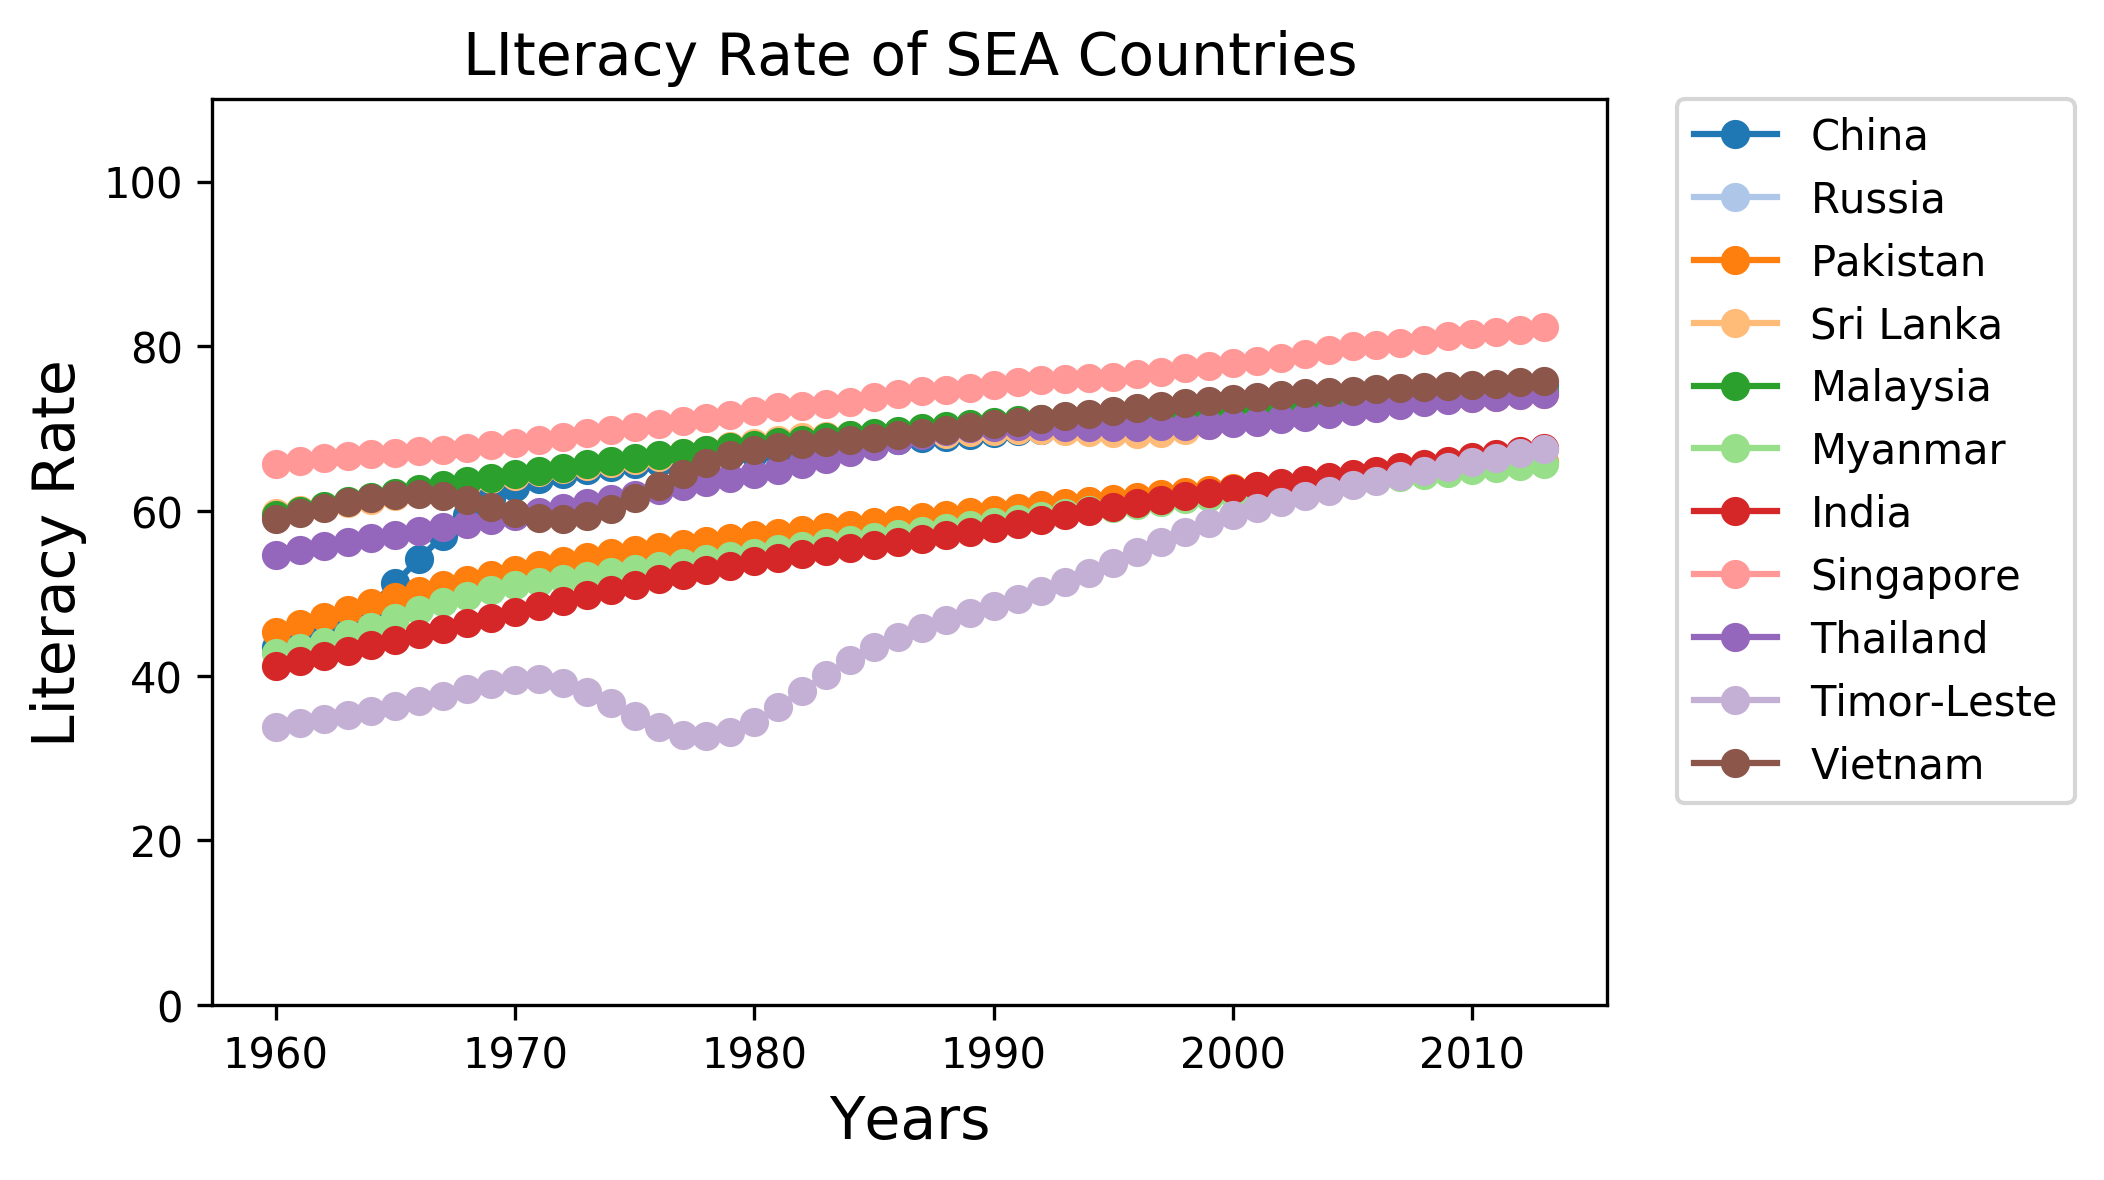

In [9]:
#life expectancy
df_ca_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_rs_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_pk_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_sl_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='SP.DYN.LE00.IN')]

fig = plt.figure()

plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,'o-',label='China',color=tableau20[0])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,'o-',label='Russia',color=tableau20[1])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,'o-',label='Pakistan',color=tableau20[2])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,'o-',label='Sri Lanka',color=tableau20[3])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,'o-',label='Malaysia',color=tableau20[4])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,'o-',label='Myanmar',color=tableau20[5])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,'o-',label='India',color=tableau20[6])
plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,'o-',label='Singapore',color=tableau20[7])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,'o-',label='Thailand',color=tableau20[8])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,'o-',label='Timor-Leste',color=tableau20[9])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Vietnam',color=tableau20[10])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Literacy Rate',  fontsize=14)
plt.title('LIteracy Rate of SEA Countries', fontsize=14)
plt.ylim([0,110])
fig.savefig('literacy_rate.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./literacy_rate.png')